<a href="https://colab.research.google.com/github/prajeet26/housing-prices-on-MECE-framework/blob/main/AssignmentHOOM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport

In [3]:
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/main_dataset.csv')

Mounted at /content/drive


In [4]:
df.head()

,sr_no,date,target_home_price,population,monthly_supply_houses,new_permits_thousands,mortgage_rate,gdp_monthly,hcai,employment_percentage,ppi_const_goods,cci_real_estate,deliquency_rate,m3_trillion
0,1,01-01-00,100.552,281083,4.3,1727,8.15,101.488,17.087,74.248,142.4,103.091,1.48,4.6669
1,2,01-02-00,101.339,281299,4.3,1692,8.25,101.547,17.087,74.270,142.7,103.151,1.48,4.6801
2,3,01-03-00,102.127,281531,4.3,1651,8.27,101.620,17.087,74.227,143.2,103.059,1.48,4.7108
3,4,01-04-00,102.922,281763,4.4,1597,8.23,101.690,16.594,74.505,143.2,103.038,1.44,4.7668
4,5,01-05-00,103.677,281996,4.4,1543,8.13,101.731,16.594,74.089,142.2,103.009,1.44,4.7546


EXPLORATORY DATA ANALYSIS

In [5]:
df=df.drop(columns=['sr_no','date'],axis=1)
df.head()

,target_home_price,population,monthly_supply_houses,new_permits_thousands,mortgage_rate,gdp_monthly,hcai,employment_percentage,ppi_const_goods,cci_real_estate,deliquency_rate,m3_trillion
0,100.552,281083,4.3,1727,8.15,101.488,17.087,74.248,142.4,103.091,1.48,4.6669
1,101.339,281299,4.3,1692,8.25,101.547,17.087,74.270,142.7,103.151,1.48,4.6801
2,102.127,281531,4.3,1651,8.27,101.620,17.087,74.227,143.2,103.059,1.48,4.7108
3,102.922,281763,4.4,1597,8.23,101.690,16.594,74.505,143.2,103.038,1.44,4.7668
4,103.677,281996,4.4,1543,8.13,101.731,16.594,74.089,142.2,103.009,1.44,4.7546


In [6]:
df.describe()

,target_home_price,population,monthly_supply_houses,new_permits_thousands,mortgage_rate,gdp_monthly,hcai,employment_percentage,ppi_const_goods,cci_real_estate,deliquency_rate,m3_trillion
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,161.977692,308360.885375,5.759289,1324.134387,5.241976,99.847209,8.829372,69.917617,188.081423,99.838901,2.592292,9.560492
std,30.992113,14854.486233,1.917019,470.409385,1.277572,1.437940,7.061953,2.358979,30.054525,1.596926,2.406876,3.594104
min,100.552000,281083.000000,3.500000,513.000000,3.310000,90.834000,2.293000,60.290000,140.100000,96.160000,0.680000,4.666900
25%,140.358000,295359.000000,4.300000,1003.000000,4.100000,99.614000,2.614000,67.812000,160.700000,98.627000,1.020000,6.455700
50%,161.991000,309847.000000,5.300000,1302.000000,5.030000,100.012000,5.199000,70.581000,192.200000,100.176000,1.510000,8.619400
75%,183.068000,321641.000000,6.600000,1665.000000,6.220000,100.535000,16.048000,71.670000,211.600000,101.039000,3.280000,12.196500
max,238.530000,330968.000000,12.200000,2263.000000,8.620000,101.814000,21.774000,74.505000,240.600000,103.151000,8.920000,19.396500


In [10]:
pd.unique(df['target_home_price'])

array([100.552, 101.339, 102.127, 102.922, 103.677, 104.424, 105.054,
       105.768, 106.537, 107.381, 108.3  , 109.138, 109.846, 110.501,
       111.108, 111.65 , 112.162, 112.795, 113.491, 114.167, 114.81 ,
       115.308, 115.854, 116.451, 117.143, 117.844, 118.687, 119.611,
       120.724, 121.812, 122.886, 123.83 , 124.778, 125.733, 126.668,
       127.622, 128.46 , 129.355, 130.148, 130.884, 131.735, 132.649,
       133.776, 134.967, 136.294, 137.532, 138.794, 140.18 , 141.648,
       143.193, 145.059, 146.592, 148.184, 149.848, 151.336, 152.632,
       154.178, 155.75 , 157.527, 159.329, 161.287, 163.343, 165.812,
       167.501, 169.351, 171.19 , 172.859, 174.442, 176.437, 178.028,
       179.682, 180.911, 182.321, 183.288, 184.364, 184.33 , 184.157,
       183.509, 183.068, 182.596, 182.8  , 183.201, 183.612, 184.141,
       184.519, 184.6  , 184.151, 183.011, 181.602, 180.256, 179.114,
       178.12 , 177.561, 176.626, 175.148, 174.342, 173.133, 171.542,
       170.053, 168.

In [11]:
#Scatterplot matrix
import plotly.express as px
fig = px.scatter_matrix(df,
    dimensions=['employment_percentage','monthly_supply_houses','new_permits_thousands','mortgage_rate'],
    color="target_home_price",height=900)
fig.show()

In [14]:
#Removing outliers
df= df[df['employment_percentage']<=72]
df= df[df['mortgage_rate']<=7]

In [15]:
#Scatterplot matrix
import plotly.express as px
fig = px.scatter_matrix(df,
    dimensions=['employment_percentage','monthly_supply_houses','new_permits_thousands','mortgage_rate'],
    color="target_home_price",height=900)
fig.show()

In [19]:
pip install missingno

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


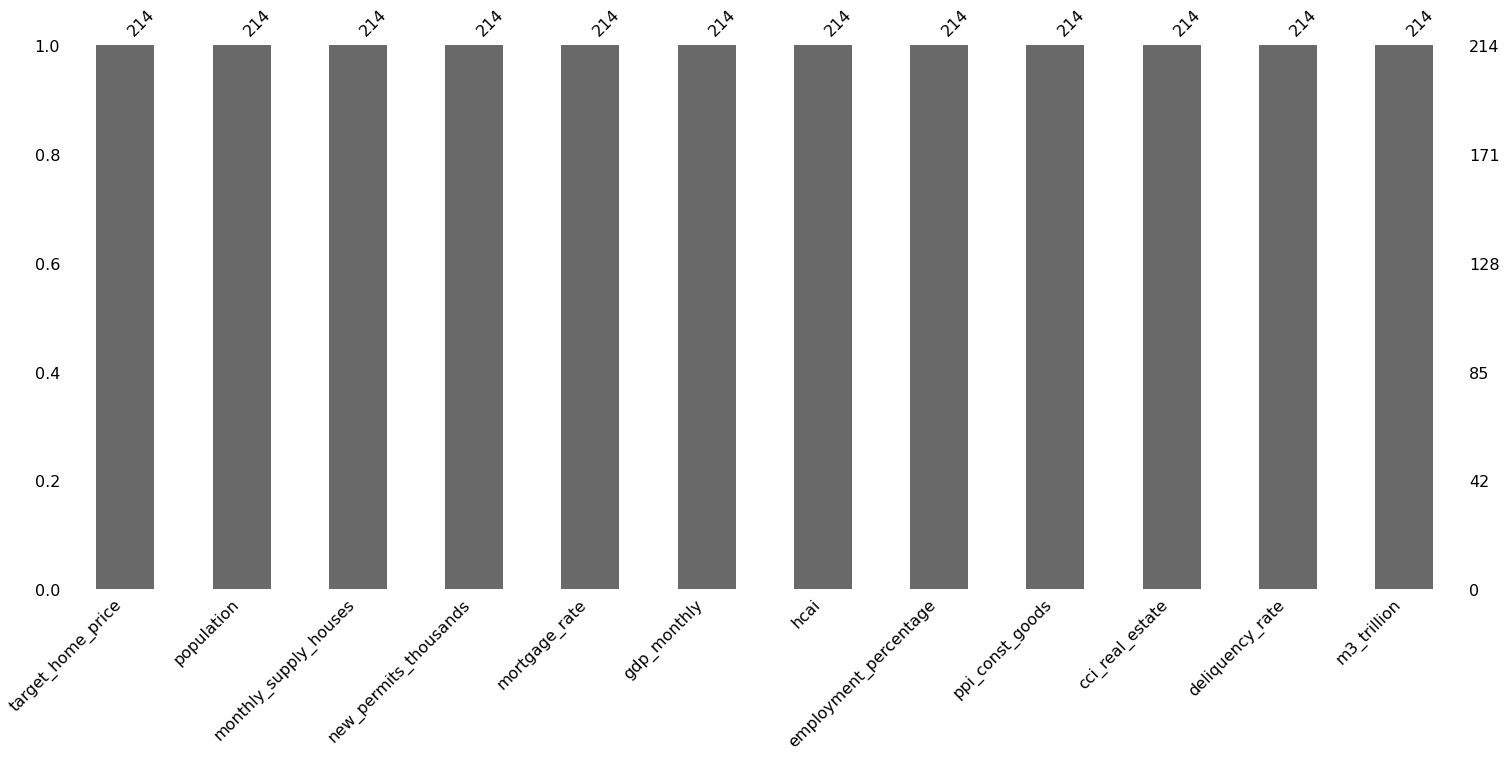

In [23]:
#CHECKING OUT THE MISSING VALIUES IN THE DATA
import seaborn as sns
import pandas as pd
import missingno as msno
%matplotlib inline
import missingno as msno
msno.bar(df)

Text(0.5, 1.0, 'Multi-Collinearity of House-Pricing Attributes')

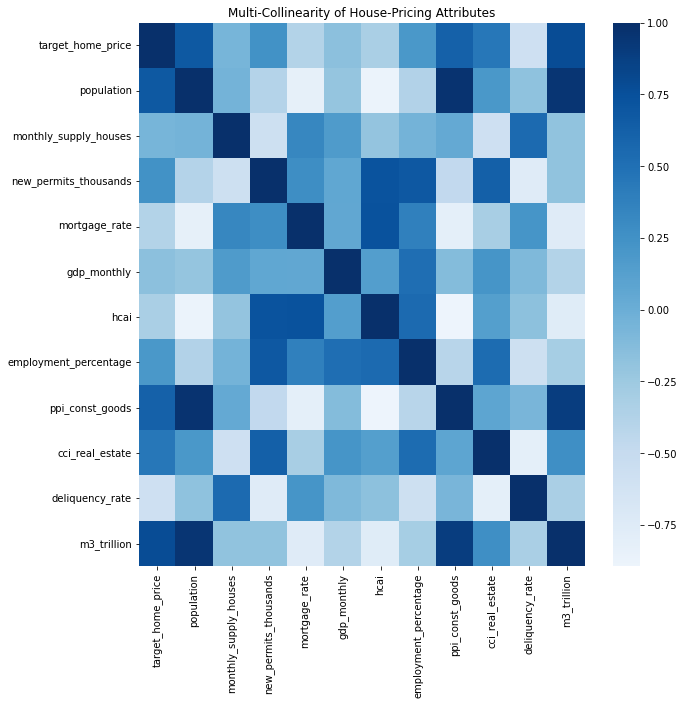

In [50]:
#CREATING A HEATMAP TO ANALYSE THE MULTI-COLLINEARITY IF THE ATTRIBUTES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), center=0, cmap='Blues')
ax.set_title('Multi-Collinearity of House-Pricing Attributes')

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
n_data=pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index) 
n_data

,target_home_price,population,monthly_supply_houses,new_permits_thousands,mortgage_rate,gdp_monthly,hcai,employment_percentage,ppi_const_goods,cci_real_estate,deliquency_rate,m3_trillion
30,0.000000,0.000000,0.080460,0.700000,1.000000,0.742987,0.706073,0.978387,0.003012,0.754427,0.120146,0.000000
31,0.008163,0.005872,0.057471,0.675429,0.980392,0.734062,0.706073,0.990432,0.006024,0.697728,0.120146,0.003071
33,0.024619,0.017312,0.057471,0.734857,0.890756,0.713661,0.724347,0.989749,0.004016,0.610803,0.115291,0.008068
34,0.032704,0.022392,0.057471,0.718857,0.815126,0.704463,0.724347,0.961729,0.000000,0.613844,0.115291,0.011697
35,0.040953,0.027099,0.057471,0.790286,0.803922,0.697359,0.724347,0.964121,0.000000,0.613307,0.115291,0.013239
...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.891252,0.989911,0.000000,0.614857,0.319328,0.465847,0.020276,0.569708,0.912651,0.484171,0.038835,0.942675
249,0.921414,0.993569,0.000000,0.618286,0.308123,0.477869,0.023151,0.644712,0.911647,0.514040,0.054612,0.953257
250,0.949206,0.996761,0.057471,0.676000,0.308123,0.489617,0.023151,0.648300,0.900602,0.505455,0.054612,0.968401
251,0.974517,0.998975,0.034483,0.711429,0.215686,0.511566,0.023151,0.660772,0.936747,0.505992,0.054612,0.980800


SPLITTING INTO TRAIN AND TEST



In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(n_data.drop(columns="target_home_price", axis=1), n_data["target_home_price"],test_size= 0.30, random_state=42)


In [29]:
#BayesianRidge to enhance prediction
from sklearn.linear_model import BayesianRidge
model_3 = BayesianRidge()

# evaluate model
scores = cross_val_score(model_3, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = np.absolute(scores)
print(f'Mean abs error: {np.mean(scores)} , {np.std(scores)}')


Mean abs error: 0.034069918606898585 , 0.006142080943142111


bayesian ridge shall be our model of choice

In [33]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(BayesianRidge(),{
    'alpha_1':list(range(0,10,1)),
    'alpha_2':list(range(0,10,1)),
    'lambda_1':list(range(0,10,1)),
    'lambda_2':list(range(0,10,1))}, cv=5, return_train_score=False )

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BayesianRidge(),
             param_grid={'alpha_1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'alpha_2': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'lambda_1': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'lambda_2': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [34]:
data = pd.DataFrame(clf.cv_results_)

In [35]:
data

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha_1,param_alpha_2,param_lambda_1,param_lambda_2,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003803,0.000340,0.002380,0.000225,0,0,0,0,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.921542,0.962419,0.957592,0.961347,0.975744,0.955729,0.018161,1926
1,0.003607,0.000115,0.003100,0.001401,0,0,0,1,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.919138,0.962438,0.957623,0.962002,0.975769,0.955394,0.019120,2736
2,0.003744,0.000184,0.002470,0.000078,0,0,0,2,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.918295,0.962452,0.957588,0.962192,0.975763,0.955258,0.019452,3130
3,0.006561,0.003746,0.003363,0.002055,0,0,0,3,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.917854,0.962461,0.957562,0.962284,0.975757,0.955184,0.019626,3411
4,0.003814,0.000191,0.002413,0.000061,0,0,0,4,"{'alpha_1': 0, 'alpha_2': 0, 'lambda_1': 0, 'l...",0.917580,0.962467,0.957545,0.962339,0.975752,0.955137,0.019733,3621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.002238,0.000158,0.001468,0.000054,9,9,9,5,"{'alpha_1': 9, 'alpha_2': 9, 'lambda_1': 9, 'l...",0.917165,0.944077,0.943309,0.952849,0.971420,0.945764,0.017522,8013
9996,0.002123,0.000043,0.001426,0.000080,9,9,9,6,"{'alpha_1': 9, 'alpha_2': 9, 'lambda_1': 9, 'l...",0.920040,0.947813,0.946155,0.954000,0.972355,0.948072,0.016819,7654
9997,0.002171,0.000232,0.001391,0.000091,9,9,9,7,"{'alpha_1': 9, 'alpha_2': 9, 'lambda_1': 9, 'l...",0.921948,0.950496,0.948128,0.954825,0.972983,0.949676,0.016381,7300
9998,0.001991,0.000076,0.001345,0.000033,9,9,9,8,"{'alpha_1': 9, 'alpha_2': 9, 'lambda_1': 9, 'l...",0.923270,0.952504,0.949566,0.955450,0.973430,0.950844,0.016100,6944


In [38]:
 print(np.max(data["mean_test_score"]))

0.956065418013201


## **ABOVE IS OUR TESTS SCORE WHICH COMES OUT TO BE 95.6% WHICH IS GOOD.**

DEFINING ANF FITTING OF MODEL



In [39]:
brmod= BayesianRidge(alpha_1=0, alpha_2=1, lambda_1=9, lambda_2=9)
fit_data =brmod.fit(X_train, y_train)

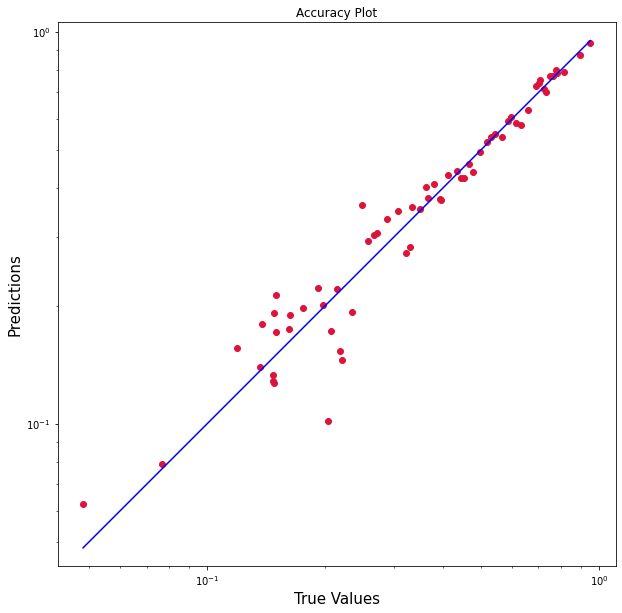

In [40]:
prediction = fit_data.predict(X_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, prediction, c='crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Accuracy Plot")
plt.axis('equal')
plt.show()

LASTLY ERROR ANALYSIS 

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
rmse=np.sqrt(mean_squared_error(y_test, prediction))
print(rmse)
r2_score(y_test, prediction)

0.03569666548697051


0.9761529360084614

# OLS ANALYSIS TO SHOW DEPENDANCY OF ATTRIBUTES ON THE REGRESSN LINE AND SO THE PREDICTION. 

In [43]:
import statsmodels.api as sm
result = sm.OLS(y_train, X_train).fit()
print(result.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



                                 OLS Regression Results                                
Dep. Variable:      target_home_price   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.980
Method:                 Least Squares   F-statistic:                              662.0
Date:                Tue, 02 Aug 2022   Prob (F-statistic):                   1.55e-113
Time:                        16:54:39   Log-Likelihood:                          203.77
No. Observations:                 149   AIC:                                     -385.5
Df Residuals:                     138   BIC:                                     -352.5
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                            coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

# **Finally the conclusion we arrive on this analysis is that,**

#**Prediction Model:** Bayesian Regression Model - as it shows the least error and better accuracy among other regression models.

# OLS Analysis shows that **monthly GDP, morgage rate and cci rate does not impact** much on the house prices as per the collected data.